Pada Tugas kali ini kita akan membuat 4 function yang memiliki fungsinya masing-masing.
Data yang diambil berasal dari berkas imdb_movie_dumpfile.sql
Silahkan import dumpfile tersebut dengan menggunakan terminal/cmd.

Jika ada proses yang dilakukan boleh dilakukan dari query sql, atau menggunakan python setelah semua data ditampilkan menggunakan sql. 

In [12]:
!pip install mysql.connector
!pip install mysql-connector-python

In [13]:
#Taruh semua library/package dsini
import mysql.connector 
from math import floor 
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
#Pada sel ini peserta diminta untuk melakukan koneksi terhadap database.
try:
  db = mysql.connector.connect(
      host = "127.0.0.1", 
      user = "", 
      password = "", 
      database = "imdb_movie"
  ) 
  print(f'[Script] : Connect to {db.database} database')
except Exception as error:
  print(f'[Script] : {error}')

[Script] : Connect to imdb_movie database


1. Peserta diminta untuk membuat sebuah fungsi yang tugasnya adalah untuk menampilkan 5 direktur dengan jumlah film terbanyak dalam daftar. Data tersebut akan menampilkan secara terurut dari urutan 1 (paling banyak) ke 5.

In [15]:
def most_maker_director():
    cursor = db.cursor()
    query = '''
    SELECT 
      director_name, 
      count(*) AS count
    FROM movies
    WHERE director_name != ""
    GROUP BY
      movies.director_name
    ORDER BY count DESC
    LIMIT 5
    ''' 
    cursor.execute(query)
    result = cursor.fetchall()
    cursor.close()

    for idx, movie in enumerate(result):
      print(f'{idx+1}. {movie[0]}')

2. Peserta diminta untuk membuat sebuah fungsi yang tugasnya adalah untuk menampilkan 10 direktur dengan total jumlah pendapatan terbesar untuk semua film yang dia buat. Data tersebut akan menampilkan secara terurut dari urutan 1 (paling banyak) ke 10 beserta total pendapatan dari masing-masing direktur.

Pendapatan bisa didapatkan dari nilai gross

In [16]:
def most_profitable_director():
    cursor = db.cursor()
    query = '''
    SELECT 
      director_name, 
      sum(gross) AS total_gross 
    FROM movies
    WHERE director_name !=''
    GROUP BY movies.director_name
    ORDER BY total_gross DESC
    LIMIT 10;
    ''' 
    cursor.execute(query)
    result = cursor.fetchall()
    cursor.close()

    for idx, movie in enumerate(result):
      print(f'{idx+1}. {movie[0]} - {"{:,.2f}".format(movie[1])}')

3. Peserta diminta untuk membuat sebuah fungsi yang tugasnya adalah untuk menampilkan 15 film dengan pendapatan terbesar. Data tersebut akan menampilkan secara terurut dari urutan 1 (paling banyak) ke 15 beserta pendapatan dari masing-masing film

In [17]:
def most_profitable_movie():
    cursor = db.cursor()
    query = ''' 
    SELECT
      DISTINCT movie_title, 
      title_year, 
      gross
    FROM movies
    ORDER BY gross DESC
    LIMIT 15;
    '''
    cursor.execute(query)
    result = cursor.fetchall()
    cursor.close()

    for idx, movie in enumerate(result):
      print(f'{idx+1}. {movie[0]} ({floor(movie[1])}) - {"{:,.2f}".format(movie[2])}')

4. Peserta diminta untuk membuat sebuah fungsi yang tugasnya adalah untuk menampilkan plot distribusi budget dari semua film pada tahun yang ditentukan. fungsi ini memiliki input, yaitu adalah tahun.

In [18]:
def plotData(data, year):
  fig, ax = plt.subplots(figsize=(8,6))
  sns.color_palette()
  sns.histplot(
      ax=ax,
      data = data,
      bins=20,
      kde = True, 
      color="blue"
  )
  ax.set_title(f'Budget movie year {year}')
  ax.set_xlabel("budget")
  ax.set_ylabel("count")
  fig.show()


def getBudget(year):
  cursor = db.cursor()
  query = f'''
  SELECT 
    budget
  FROM movies
  WHERE 
    title_year = {year} AND 
    budget!='';
  '''
  cursor.execute(query)
  result = cursor.fetchall()
  cursor.close()

  result = [el[0] for el in result]

  return result;


def budget_distribution(year):
  result = getBudget(year)
  plotData(result, year)


Semua sel di bawah digunakan untuk pemanggilan fungsi dan menunjukan hasil yang diharapkan.

In [19]:
most_maker_director()

1. Steven Spielberg
2. Woody Allen
3. Martin Scorsese
4. Clint Eastwood
5. Ridley Scott


Expected Result:

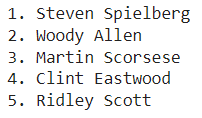

In [20]:
most_profitable_director()

1. Steven Spielberg - 4,114,233,101.00
2. Peter Jackson - 2,592,969,279.00
3. Michael Bay - 2,231,242,537.00
4. Tim Burton - 2,071,275,480.00
5. Sam Raimi - 2,049,549,198.00
6. James Cameron - 1,948,125,910.00
7. Christopher Nolan - 1,813,227,576.00
8. George Lucas - 1,741,418,480.00
9. Joss Whedon - 1,730,886,628.00
10. Robert Zemeckis - 1,619,309,108.00


Expected Result: 

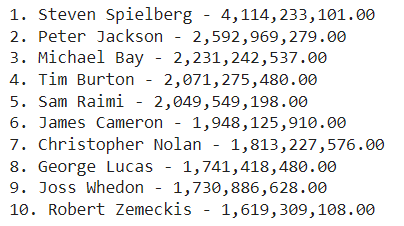


In [21]:
most_profitable_movie()

1. Avatar  (2009) - 760,505,847.00
2. Titanic  (1997) - 658,672,302.00
3. Jurassic World  (2015) - 652,177,271.00
4. The Avengers  (2012) - 623,279,547.00
5. The Dark Knight  (2008) - 533,316,061.00
6. Star Wars: Episode I - The Phantom Menace  (1999) - 474,544,677.00
7. Star Wars: Episode IV - A New Hope  (1977) - 460,935,665.00
8. Avengers: Age of Ultron  (2015) - 458,991,599.00
9. The Dark Knight Rises  (2012) - 448,130,642.00
10. Shrek 2  (2004) - 436,471,036.00
11. E.T. the Extra-Terrestrial  (1982) - 434,949,459.00
12. The Hunger Games: Catching Fire  (2013) - 424,645,577.00
13. Pirates of the Caribbean: Dead Man's Chest  (2006) - 423,032,628.00
14. The Lion King  (1994) - 422,783,777.00
15. Toy Story 3  (2010) - 414,984,497.00


Expected Result : 

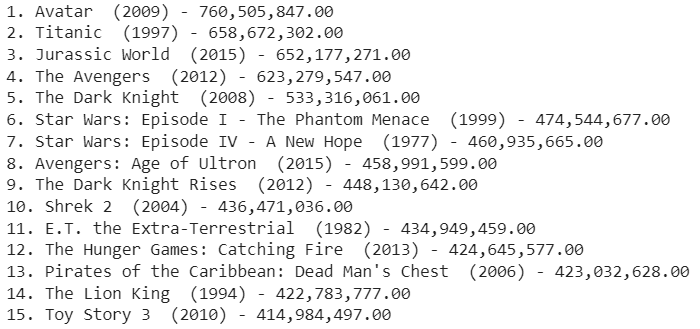

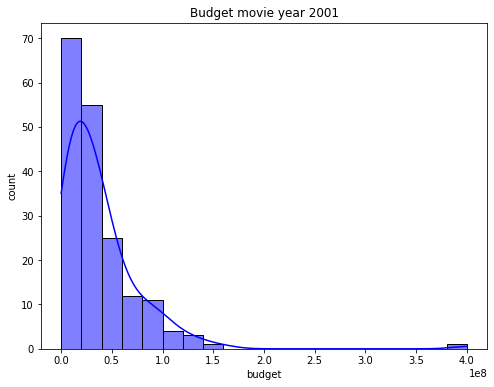

In [22]:
year = 2001
budget_distribution(year)
db.close()

Expected Result

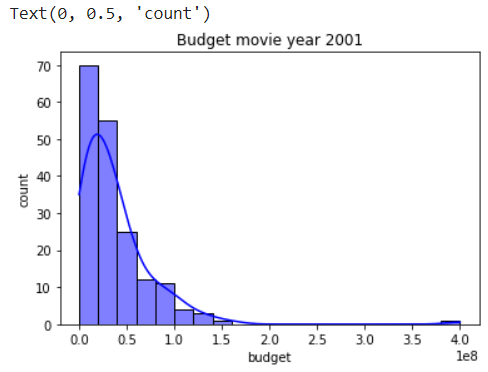![image.png]()